In [1]:
import json
import pandas as pd

import matplotlib as mtl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np
from folium import plugins
from folium.plugins import HeatMap
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag, pos_tag_sents
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score


In [2]:
N = 30000
with open('C:/Users/ashwi/Desktop/dataset/yelp_academic_dataset_review/yelp_academic_dataset_review.json', 'rb') as datafile:
    dataSubset = [next(datafile) for x in range(N)]

In [3]:
#Subset the number of lines (e.g. reading first 10,000 lines here)
B = 30000
with open('C:/Users/ashwi/Desktop/dataset/yelp_academic_dataset_business/yelp_academic_dataset_business.json', 'rb') as datafile:
    dataSubset1 = [next(datafile) for x in range(B)]
    
    

In [4]:
parsed1 = json.loads(dataSubset[0]) #[0] gives the first element
#print(json.dumps(parsed, indent=4, sort_keys=True))
processedData1 = "[" + ','.join([d.strip().decode('UTF-8') for d in dataSubset1]) + "]"
dfData = pd.read_json(processedData1)
dfData.dropna(axis=0)
dfData

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC
5,"Credit Valley Town Plaza, F2 - 6045 Creditview Rd","{'BusinessParking': '{'garage': False, 'street...",68dUKd8_8liJ7in4aWOSEA,"Shipping Centers, Couriers & Delivery Services...",Mississauga,"{'Monday': '9:0-19:0', 'Tuesday': '9:0-20:0', ...",1,43.599475,-79.711584,The UPS Store,L5V 0B1,3,2.5,ON
6,20 Douglas Woods Drive Southeast,"{'RestaurantsPriceRange2': '2', 'BusinessParki...",5JucpCfHZltJh5r1JabjDg,"Beauty & Spas, Hair Salons",Calgary,None,1,50.943646,-114.001828,Edgeworxx Studio,T2Z 1K4,7,3.5,AB
7,"4545 E Tropicana Rd Ste 8, Tropicana","{'RestaurantsPriceRange2': '3', 'GoodForKids':...",gbQN7vr_caG_A1ugSmGhWg,"Hair Salons, Hair Stylists, Barbers, Men's Hai...",Las Vegas,"{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'...",1,36.099872,-115.074574,Supercuts,89121,3,3.5,NV
8,5940 W Union Hills Dr,"{'RestaurantsPriceRange2': '2', 'ByAppointment...",Y6iyemLX_oylRpnr38vgMA,"Nail Salons, Beauty & Spas, Day Spas",Glendale,"{'Tuesday': '12:0-18:0', 'Wednesday': '10:0-18...",0,33.654815,-112.188568,Vita Bella Fine Day Spa,85308,8,5.0,AZ
9,21689 Lorain Rd,"{'ByAppointmentOnly': 'False', 'BusinessAccept...",4GBVPIYRvzGh4K4TkRQ_rw,"Beauty & Spas, Nail Salons, Day Spas, Massage",Fairview Park,"{'Tuesday': '9:0-21:0', 'Wednesday': '9:0-21:0...",1,41.440825,-81.854097,Options Salon & Spa,44126,8,4.5,OH


In [5]:
parsed = json.loads(dataSubset[0]) #[0] gives the first element
print(json.dumps(parsed, indent=4, sort_keys=True))
processedData = "[" + ','.join([d.strip().decode('UTF-8') for d in dataSubset]) + "]"
dfReview = pd.read_json(processedData)
dfReview

{
    "business_id": "ujmEBvifdJM6h6RLv4wQIg",
    "cool": 0,
    "date": "2013-05-07 04:34:36",
    "funny": 1,
    "review_id": "Q1sbwvVQXV2734tPgoKj4Q",
    "stars": 1.0,
    "text": "Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge us $69 for 3 pills. I checked online the pills can be had for 19 cents EACH! Avoid Hospital ERs at all costs.",
    "useful": 6,
    "user_id": "hG7b0MtEbXx5QzbzE6C_VA"
}


,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1,Q1sbwvVQXV2734tPgoKj4Q,1,Total bill for this horrible service? Over $8G...,6,hG7b0MtEbXx5QzbzE6C_VA
1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0,GJXCdrto3ASJOqKeVWPi6Q,5,I *adore* Travis at the Hard Rock's new Kelly ...,0,yXQM5uF2jS6es16SJzNHfg
2,WTqjgwHlXbSFevF32_DJVw,0,2016-11-09 20:09:03,0,2TzJjDVDEuAW6MR5Vuc1ug,5,I have to say that this office really has it t...,3,n6-Gk65cPZL6Uz8qRm3NYw
3,ikCg8xy5JIg_NGPx-MSIDA,0,2018-01-09 20:56:38,0,yi0R0Ugj_xUx_Nek0-_Qig,5,Went in for a lunch. Steak sandwich was delici...,0,dacAIZ6fTM6mqwW5uxkskg
4,b1b1eb3uo-w561D0ZfCEiQ,0,2018-01-30 23:07:38,0,11a8sVPMUFtaC7_ABRkmtw,1,Today was my second out of three sessions I ha...,7,ssoyf2_x0EQMed6fgHeMyQ
5,eU_713ec6fTGNO4BegRaww,0,2013-01-20 13:25:59,0,fdiNeiN_hoCxCMy2wTRW9g,4,I'll be the first to admit that I was not exci...,0,w31MKYsNFMrjhWxxAb5wIw
6,3fw2X5bZYeW9xCz_zGhOHg,5,2016-05-07 01:21:02,4,G7XHMxG0bx9oBJNECG4IFg,3,Tracy dessert had a big name in Hong Kong and ...,5,jlu4CztcSxrKx56ba1a5AQ
7,zvO-PJCpNk4fgAVUnExYAA,1,2010-10-05 19:12:35,1,8e9HxxLjjqc9ez5ezzN7iQ,1,This place has gone down hill. Clearly they h...,3,d6xvYpyzcfbF_AZ8vMB7QA
8,b2jN2mm9Wf3RcrZCgfo1cg,0,2015-01-18 14:04:18,0,qrffudO73zsslZbe8B9D3Q,2,I was really looking forward to visiting after...,1,sG_h0dIzTKWa3Q6fmb4u-g
9,oxwGyA17NL6c5t1Etg5WgQ,1,2012-02-29 21:52:43,0,RS_GTIT6836bCaPy637kNQ,3,It's a giant Best Buy with 66 registers. I do...,1,nMeCE5-xsdleyxYuNZ_7rA


In [6]:
dfReview.to_csv("yelpReviews.csv",index=False)
dfRead1=pd.read_csv("yelpReviews.csv",encoding="ISO-8859-1")
dfRead1.head()
dfReview.dropna()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1,Q1sbwvVQXV2734tPgoKj4Q,1,Total bill for this horrible service? Over $8G...,6,hG7b0MtEbXx5QzbzE6C_VA
1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0,GJXCdrto3ASJOqKeVWPi6Q,5,I *adore* Travis at the Hard Rock's new Kelly ...,0,yXQM5uF2jS6es16SJzNHfg
2,WTqjgwHlXbSFevF32_DJVw,0,2016-11-09 20:09:03,0,2TzJjDVDEuAW6MR5Vuc1ug,5,I have to say that this office really has it t...,3,n6-Gk65cPZL6Uz8qRm3NYw
3,ikCg8xy5JIg_NGPx-MSIDA,0,2018-01-09 20:56:38,0,yi0R0Ugj_xUx_Nek0-_Qig,5,Went in for a lunch. Steak sandwich was delici...,0,dacAIZ6fTM6mqwW5uxkskg
4,b1b1eb3uo-w561D0ZfCEiQ,0,2018-01-30 23:07:38,0,11a8sVPMUFtaC7_ABRkmtw,1,Today was my second out of three sessions I ha...,7,ssoyf2_x0EQMed6fgHeMyQ
5,eU_713ec6fTGNO4BegRaww,0,2013-01-20 13:25:59,0,fdiNeiN_hoCxCMy2wTRW9g,4,I'll be the first to admit that I was not exci...,0,w31MKYsNFMrjhWxxAb5wIw
6,3fw2X5bZYeW9xCz_zGhOHg,5,2016-05-07 01:21:02,4,G7XHMxG0bx9oBJNECG4IFg,3,Tracy dessert had a big name in Hong Kong and ...,5,jlu4CztcSxrKx56ba1a5AQ
7,zvO-PJCpNk4fgAVUnExYAA,1,2010-10-05 19:12:35,1,8e9HxxLjjqc9ez5ezzN7iQ,1,This place has gone down hill. Clearly they h...,3,d6xvYpyzcfbF_AZ8vMB7QA
8,b2jN2mm9Wf3RcrZCgfo1cg,0,2015-01-18 14:04:18,0,qrffudO73zsslZbe8B9D3Q,2,I was really looking forward to visiting after...,1,sG_h0dIzTKWa3Q6fmb4u-g
9,oxwGyA17NL6c5t1Etg5WgQ,1,2012-02-29 21:52:43,0,RS_GTIT6836bCaPy637kNQ,3,It's a giant Best Buy with 66 registers. I do...,1,nMeCE5-xsdleyxYuNZ_7rA


In [7]:
all_biz=dfData['business_id']
dfReview[dfReview['business_id'].isin(all_biz)]
dfReview.dropna()
dfReview


,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1,Q1sbwvVQXV2734tPgoKj4Q,1,Total bill for this horrible service? Over $8G...,6,hG7b0MtEbXx5QzbzE6C_VA
1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0,GJXCdrto3ASJOqKeVWPi6Q,5,I *adore* Travis at the Hard Rock's new Kelly ...,0,yXQM5uF2jS6es16SJzNHfg
2,WTqjgwHlXbSFevF32_DJVw,0,2016-11-09 20:09:03,0,2TzJjDVDEuAW6MR5Vuc1ug,5,I have to say that this office really has it t...,3,n6-Gk65cPZL6Uz8qRm3NYw
3,ikCg8xy5JIg_NGPx-MSIDA,0,2018-01-09 20:56:38,0,yi0R0Ugj_xUx_Nek0-_Qig,5,Went in for a lunch. Steak sandwich was delici...,0,dacAIZ6fTM6mqwW5uxkskg
4,b1b1eb3uo-w561D0ZfCEiQ,0,2018-01-30 23:07:38,0,11a8sVPMUFtaC7_ABRkmtw,1,Today was my second out of three sessions I ha...,7,ssoyf2_x0EQMed6fgHeMyQ
5,eU_713ec6fTGNO4BegRaww,0,2013-01-20 13:25:59,0,fdiNeiN_hoCxCMy2wTRW9g,4,I'll be the first to admit that I was not exci...,0,w31MKYsNFMrjhWxxAb5wIw
6,3fw2X5bZYeW9xCz_zGhOHg,5,2016-05-07 01:21:02,4,G7XHMxG0bx9oBJNECG4IFg,3,Tracy dessert had a big name in Hong Kong and ...,5,jlu4CztcSxrKx56ba1a5AQ
7,zvO-PJCpNk4fgAVUnExYAA,1,2010-10-05 19:12:35,1,8e9HxxLjjqc9ez5ezzN7iQ,1,This place has gone down hill. Clearly they h...,3,d6xvYpyzcfbF_AZ8vMB7QA
8,b2jN2mm9Wf3RcrZCgfo1cg,0,2015-01-18 14:04:18,0,qrffudO73zsslZbe8B9D3Q,2,I was really looking forward to visiting after...,1,sG_h0dIzTKWa3Q6fmb4u-g
9,oxwGyA17NL6c5t1Etg5WgQ,1,2012-02-29 21:52:43,0,RS_GTIT6836bCaPy637kNQ,3,It's a giant Best Buy with 66 registers. I do...,1,nMeCE5-xsdleyxYuNZ_7rA


In [8]:
dfComps = pd.DataFrame()
for biz in all_biz:
    dfComps=dfComps.append(dfReview[dfReview['business_id']==biz])


In [9]:
import nltk
from nltk.tokenize import sent_tokenize
Sentiment_count=dfReview['text'].count()
Sentiment_count

30000

In [10]:
df1 = dfReview.iloc[0:3000]
df1['text']

0       Total bill for this horrible service? Over $8G...
1       I *adore* Travis at the Hard Rock's new Kelly ...
2       I have to say that this office really has it t...
3       Went in for a lunch. Steak sandwich was delici...
4       Today was my second out of three sessions I ha...
5       I'll be the first to admit that I was not exci...
6       Tracy dessert had a big name in Hong Kong and ...
7       This place has gone down hill.  Clearly they h...
8       I was really looking forward to visiting after...
9       It's a giant Best Buy with 66 registers.  I do...
10      Like walking back in time, every Saturday morn...
11      Walked in around 4 on a Friday afternoon, we s...
12      Wow. So surprised at the one and two star revi...
13      Michael from Red Carpet VIP is amazing ! I rea...
14      I cannot believe how things have changed in 3 ...
15      You can't really find anything wrong with this...
16      Great lunch today. Staff was very helpful in a...
17      I love

In [11]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(''.join(df1['text']))
tokenized_word
test = pd.DataFrame(tokenized_word,columns=['words'])


In [12]:
from nltk.corpus import stopwords
from nltk import pos_tag, pos_tag_sents

stop_words=set(stopwords.words("english"))
print(stop_words)

{'where', "don't", 'do', 'or', 'is', 'have', 'not', 'shouldn', 'during', 'more', 'isn', "needn't", 'any', 'its', 'been', 'about', 'off', 'again', 'should', 'as', 'for', 'until', 'couldn', 'and', 'all', 'herself', 'so', 'now', 'himself', "isn't", 'her', 'yourself', 'hers', "aren't", 'because', 'wasn', 'them', 'then', 've', 'your', 'ain', 'than', "that'll", "mustn't", 'very', 'shan', 'his', 'it', 'hadn', 'at', 's', 'we', 'both', 'being', 'those', "you're", 'a', 'these', "wasn't", 'm', 'were', 'such', 'up', 'nor', 'can', 'only', 'through', 'doesn', 'you', 'was', 'some', 'yours', 'out', "haven't", "wouldn't", 'into', 'are', 'am', 're', 'against', "won't", 'under', 'why', 'hasn', 't', 'down', 'o', 'me', 'haven', "shan't", 'themselves', 'over', 'above', 'in', 'by', 'had', "shouldn't", 'whom', "didn't", 'my', 'what', 'no', "weren't", 'own', 'of', "you've", 'with', 'the', 'this', 'didn', 'has', 'each', 'weren', 'ourselves', "you'd", "it's", 'who', 'did', 'they', 'doing', 'same', "should've", "

In [13]:
df1['w_stop'] = test['words'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


C:\Users\ashwi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
pos_tag_sents( df1['w_stop'].apply(word_tokenize).tolist() )

[[('Total', 'JJ')],
 [('bill', 'NN')],
 [],
 [],
 [('horrible', 'JJ')],
 [('service', 'NN')],
 [('?', '.')],
 [('Over', 'IN')],
 [('$', '$')],
 [('8Gs', 'CD')],
 [('.', '.')],
 [('These', 'DT')],
 [('crooks', 'NNS')],
 [('actually', 'RB')],
 [],
 [],
 [('nerve', 'NN')],
 [],
 [('charge', 'NN')],
 [('us', 'PRP')],
 [('$', '$')],
 [('69', 'CD')],
 [],
 [('3', 'CD')],
 [('pills', 'NNS')],
 [('.', '.')],
 [('I', 'PRP')],
 [('checked', 'NNS')],
 [('online', 'NN')],
 [],
 [('pills', 'NNS')],
 [],
 [],
 [],
 [],
 [('19', 'CD')],
 [('cents', 'NNS')],
 [('EACH', 'NN')],
 [('!', '.')],
 [('Avoid', 'NN')],
 [('Hospital', 'NN')],
 [('ERs', 'NN')],
 [],
 [],
 [('costs.I', 'NN')],
 [('*adore*', 'NN')],
 [('Travis', 'NN')],
 [],
 [],
 [('Hard', 'NNP')],
 [('Rock', 'NN')],
 [("'s", 'POS')],
 [('new', 'JJ')],
 [('Kelly', 'RB')],
 [('Cardenas', 'NNS')],
 [('Salon', 'NN')],
 [('!', '.')],
 [('I', 'PRP')],
 [("'m", 'VBP')],
 [('always', 'RB')],
 [],
 [('fan', 'NN')],
 [],
 [],
 [('great', 'JJ')],
 [('blow

In [15]:
dfComps['type']=dfComps[['cool','funny','useful']].idxmax(axis=1)

In [16]:
data_classes=['cool','funny','useful']
dfComps['type'].apply(data_classes.index)

2583     2
8609     2
17253    0
23456    0
24704    2
1790     2
12256    0
1436     2
11260    2
13086    0
267      0
26044    0
3631     0
1771     2
7522     2
12962    0
18217    0
3339     2
8247     0
532      0
14708    0
22275    2
26192    2
16466    2
238      0
8260     0
18886    0
19816    0
19895    0
27785    0
        ..
27411    0
5821     0
12897    0
29106    2
8341     2
8382     2
893      2
10225    0
14010    0
19996    0
24121    0
4296     1
7269     2
13167    2
17278    0
21323    0
28119    0
28769    2
19044    0
9554     0
19937    0
17427    2
1337     0
5391     2
5645     2
14515    2
27539    2
4973     1
10997    2
21586    2
Name: type, Length: 30000, dtype: int64

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
from nltk.tokenize import RegexpTokenizer
token =RegexpTokenizer(r'[a-zA-Z0-9]+')
cv=CountVectorizer(lowercase=True,stop_words='english',ngram_range=(1,1),tokenizer=token.tokenize)
t_counts=cv.fit_transform(dfComps['text'], dfComps['type'])
t_counts

<30000x43558 sparse matrix of type '<class 'numpy.int64'>'
	with 1273938 stored elements in Compressed Sparse Row format>

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(t_counts,dfComps['type'],test_size=0.3,random_state=1)

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

clf = MultinomialNB()
clf.fit(x_train, y_train)
predicted =clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,predicted))

Accuracy: 0.6181111111111111


In [21]:
a=np.array(predicted)
b=predicted.tolist()


In [22]:
dfComp1=pd.DataFrame(b,columns=['predicted'])
dfComps['predicted']=dfComp1['predicted']


In [23]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from os import path
from PIL import Image
from nltk.corpus import stopwords


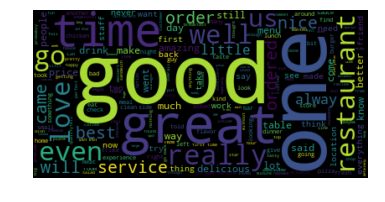

In [24]:
#Wordcloud for cool reviewsz 
cool = dfComps['predicted']=="cool"
cool_p =dfComps[cool]
dfCool = pd.DataFrame(data=cool_p)
text3 = ' '.join(review for review in dfCool['text'])
text3 = text3.replace('food','')
text3 = text3.replace('place','')
text3 = text3.replace('got','')
stop_w= set(STOPWORDS)
wordcloud = WordCloud(stopwords=stop_w, background_color="Black").generate(text3)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

[[4401   29 1165]
 [ 323   14  231]
 [1661   28 1148]]


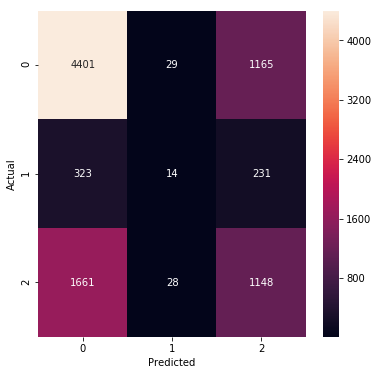

In [25]:
clf.fit(x_train,y_train)
print(confusion_matrix(y_test,predicted))
con = confusion_matrix(y_test,predicted)

fig, vx = plt.subplots(figsize=(6,6))
sns.heatmap(con,annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(dfComps['text'])

x_training,x_testing,y_training,y_testing=train_test_split(text_tf,dfComps['type'],test_size=0.3,random_state=1)

clf.fit(x_training, y_training)
pred =clf.predict(x_testing)
print("Accuracy:",metrics.accuracy_score(y_testing,pred))

Accuracy: 0.6258888888888889


In [27]:
x_traing,x_testg,y_traing,y_testg=train_test_split(text_tf,dfComps['type'],test_size=0.3,random_state=1)

In [28]:
from sklearn.linear_model import LogisticRegression
classify = LogisticRegression()
classify.fit(x_traing,y_traing)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
prediction = classify.predict(x_testg)
print("Accuracy:",metrics.accuracy_score(y_testg,prediction))



Accuracy: 0.6396666666666667


[[4401   29 1165]
 [ 323   14  231]
 [1661   28 1148]]


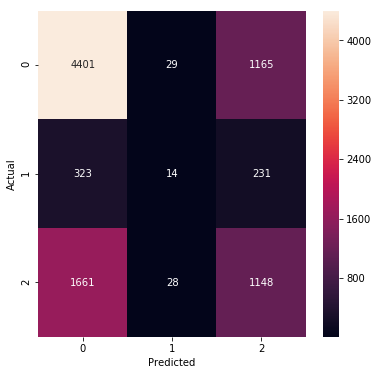

In [30]:
print(confusion_matrix(y_testg,predicted))
conf = confusion_matrix(y_testg,predicted)

fig, ux = plt.subplots(figsize=(6,6))
sns.heatmap(conf,annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [31]:
prediction.tolist()

['cool',
 'useful',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'useful',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'useful',
 'useful',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'useful',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'useful',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'useful',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'useful',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'useful',
 'cool',
 'cool',
 'useful',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'useful',
 'cool',
 'useful',
 'useful',
 'cool',
 'cool',
 'cool',
 'useful',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'useful',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool',
 'cool'